<a href="https://colab.research.google.com/github/eleven111101/Linear_regression-01/blob/main/LiR_House_price__prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv("/content/house_price.csv")

In [120]:
df.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,living_room_size,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
0,201 sqm,177,3,1,Small,1,1,No,3.3,1,10,0,6.8,0.90,0,165432
1,196 sqm,182,4,3,Large,1,0,Yes,1.2,1,11,0,4.1,1.42,1,187043
2,198 sqm,182,4,4,Large,1,0,Yes,5.9,0,20,0,2.1,4.12,1,148658
3,178 sqm,166,2,3,Small,1,0,No,5.9,0,5,0,0.7,4.36,0,123785
4,183 sqm,165,3,1,Large,1,0,No,3.8,1,8,0,0.7,0.42,0,156470


In [121]:
df.head(10)

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,living_room_size,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
0,201 sqm,177,3,1,Small,1,1,No,3.3,1,10,0,6.8,0.90,0,165432
1,196 sqm,182,4,3,Large,1,0,Yes,1.2,1,11,0,4.1,1.42,1,187043
2,198 sqm,182,4,4,Large,1,0,Yes,5.9,0,20,0,2.1,4.12,1,148658
3,178 sqm,166,2,3,Small,1,0,No,5.9,0,5,0,0.7,4.36,0,123785
4,183 sqm,165,3,1,Large,1,0,No,3.8,1,8,0,0.7,0.42,0,156470
5,399 sqm,377,6,5,Large,1,1,Yes,4.5,1,7,0,6.4,5.53,0,306596
6,337 sqm,334,5,3,Large,0,1,Yes,0.2,1,14,0,2.1,0.89,0,283236
7,110 sqm,94,1,2,Small,0,0,No,5.7,1,1,0,4.5,3.18,0,76026
8,170 sqm,159,3,4,Large,0,1,No,3.4,0,22,0,3.5,4.84,1,121398
9,128 sqm,116,1,2,Small,0,1,No,0.8,0,1,0,5.4,4.98,1,105593


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   object 
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   living_room_size            4954 non-null   object 
 5   parking_space               4954 non-null   int64  
 6   front_garden                4954 non-null   int64  
 7   swimming_pool               4954 non-null   object 
 8   distance_to_school          4954 non-null   float64
 9   wall_fence                  4954 non-null   int64  
 10  house_age                   4954 non-null   int64  
 11  water_front                 4954 non-null   int64  
 12  distance_to_supermarket_km  4954 non-null   float64
 13  crime_rate_index            4954 

In [123]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
house_size_sqm,4954.0,231.250908,94.571642,85.00,165.00,217.50,274.00,760.00
no_of_rooms,4954.0,3.788252,1.585371,1.00,3.00,4.00,5.00,8.00
no_of_bathrooms,4954.0,3.199839,1.602300,1.00,2.00,3.00,4.00,9.00
parking_space,4954.0,0.763827,0.424772,0.00,1.00,1.00,1.00,1.00
front_garden,4954.0,0.627574,0.483500,0.00,0.00,1.00,1.00,1.00
distance_to_school,4954.0,3.454219,2.007358,0.10,1.70,3.40,5.20,6.90
wall_fence,4954.0,0.630400,0.482745,0.00,0.00,1.00,1.00,1.00
house_age,4954.0,11.444691,6.356991,1.00,6.00,11.00,17.00,22.00
water_front,4954.0,0.048648,0.215152,0.00,0.00,0.00,0.00,1.00
distance_to_supermarket_km,4954.0,3.508639,1.991266,0.10,1.80,3.50,5.30,6.90


In [124]:
df["land_size_sqm"][0]

'201 sqm'

In [125]:
df["land_size_sqm"][0][-1]


'm'

In [126]:
def land_size(x):
  return x[:-4]

In [127]:
df["land_size_sqm"].apply(land_size)

0       201
1       196
2       198
3       178
4       183
       ... 
4949    297
4950    302
4951    153
4952    180
4953    695
Name: land_size_sqm, Length: 4954, dtype: object

In [128]:
df["land_size_sqm"].apply(lambda x : x[::-4])

0       m1
1       m6
2       m8
3       m8
4       m3
        ..
4949    m7
4950    m2
4951    m3
4952    m0
4953    m5
Name: land_size_sqm, Length: 4954, dtype: object

In [129]:
df["land_size_sqm"] = df["land_size_sqm"].apply(lambda x : int(x[:-4]))

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   living_room_size            4954 non-null   object 
 5   parking_space               4954 non-null   int64  
 6   front_garden                4954 non-null   int64  
 7   swimming_pool               4954 non-null   object 
 8   distance_to_school          4954 non-null   float64
 9   wall_fence                  4954 non-null   int64  
 10  house_age                   4954 non-null   int64  
 11  water_front                 4954 non-null   int64  
 12  distance_to_supermarket_km  4954 non-null   float64
 13  crime_rate_index            4954 

In [131]:
df["swimming_pool"]

0        No
1       Yes
2       Yes
3        No
4        No
       ... 
4949    Yes
4950    Yes
4951     No
4952    Yes
4953    Yes
Name: swimming_pool, Length: 4954, dtype: object

In [133]:
df["swimming_pool"].apply(lambda x : 1 if x=="Yes" else 0)

0       0
1       1
2       1
3       0
4       0
       ..
4949    1
4950    1
4951    0
4952    1
4953    1
Name: swimming_pool, Length: 4954, dtype: int64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   living_room_size            4954 non-null   object 
 5   parking_space               4954 non-null   int64  
 6   front_garden                4954 non-null   int64  
 7   swimming_pool               4954 non-null   object 
 8   distance_to_school          4954 non-null   float64
 9   wall_fence                  4954 non-null   int64  
 10  house_age                   4954 non-null   int64  
 11  water_front                 4954 non-null   int64  
 12  distance_to_supermarket_km  4954 non-null   float64
 13  crime_rate_index            4954 

In [135]:
df["swimming_pool"]=df["swimming_pool"].apply(lambda x : int(1 if x=="Yes" else 0))

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   living_room_size            4954 non-null   object 
 5   parking_space               4954 non-null   int64  
 6   front_garden                4954 non-null   int64  
 7   swimming_pool               4954 non-null   int64  
 8   distance_to_school          4954 non-null   float64
 9   wall_fence                  4954 non-null   int64  
 10  house_age                   4954 non-null   int64  
 11  water_front                 4954 non-null   int64  
 12  distance_to_supermarket_km  4954 non-null   float64
 13  crime_rate_index            4954 

In [137]:
df["living_room_size"]

0       Small
1       Large
2       Large
3       Small
4       Large
        ...  
4949    Large
4950    Large
4951    Large
4952    Small
4953    Large
Name: living_room_size, Length: 4954, dtype: object

In [138]:
df["living_room_size"].apply(lambda x : 1 if x == "Large" else 0)

0       0
1       1
2       1
3       0
4       1
       ..
4949    1
4950    1
4951    1
4952    0
4953    1
Name: living_room_size, Length: 4954, dtype: int64

In [139]:
df["living_room_size"] = df["living_room_size"].apply(lambda x : int(1 if x == "Large" else 0))

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   living_room_size            4954 non-null   int64  
 5   parking_space               4954 non-null   int64  
 6   front_garden                4954 non-null   int64  
 7   swimming_pool               4954 non-null   int64  
 8   distance_to_school          4954 non-null   float64
 9   wall_fence                  4954 non-null   int64  
 10  house_age                   4954 non-null   int64  
 11  water_front                 4954 non-null   int64  
 12  distance_to_supermarket_km  4954 non-null   float64
 13  crime_rate_index            4954 

In [141]:
df.corr()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,living_room_size,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
land_size_sqm,1.000000,0.991371,0.898252,0.679780,0.371985,0.411108,0.501055,0.497159,-0.011094,0.443698,0.006547,0.018665,0.004692,0.007752,0.322612,0.973662
house_size_sqm,0.991371,1.000000,0.894753,0.677722,0.372900,0.384615,0.500914,0.500106,-0.010658,0.445266,0.008198,0.018977,0.001966,0.008044,0.322504,0.964163
no_of_rooms,0.898252,0.894753,1.000000,0.710043,0.452951,0.493262,0.603783,0.606602,-0.006162,0.547999,0.003455,0.026654,-0.007287,0.014644,0.363811,0.912155
no_of_bathrooms,0.679780,0.677722,0.710043,1.000000,0.310658,0.330699,0.419505,0.431550,-0.008322,0.365661,0.000966,0.021575,-0.002535,0.010655,0.258000,0.686525
living_room_size,0.371985,0.372900,0.452951,0.310658,1.000000,0.264601,0.329218,0.311235,0.003458,0.269745,0.003789,0.043128,0.008190,0.010799,0.167024,0.404843
parking_space,0.411108,0.384615,0.493262,0.330699,0.264601,1.000000,0.368903,0.371334,0.025226,0.314644,-0.001848,0.017491,-0.016110,-0.007465,0.202987,0.459860
front_garden,0.501055,0.500914,0.603783,0.419505,0.329218,0.368903,1.000000,0.327034,-0.008106,0.362512,0.005548,0.028637,-0.012637,-0.009018,0.235309,0.543363
swimming_pool,0.497159,0.500106,0.606602,0.431550,0.311235,0.371334,0.327034,1.000000,0.003723,0.361410,0.004264,-0.005525,-0.018826,0.020902,0.250068,0.569673
distance_to_school,-0.011094,-0.010658,-0.006162,-0.008322,0.003458,0.025226,-0.008106,0.003723,1.000000,-0.021986,0.011519,-0.013448,0.010095,-0.002084,-0.015233,-0.072357
wall_fence,0.443698,0.445266,0.547999,0.365661,0.269745,0.314644,0.362512,0.361410,-0.021986,1.000000,0.011068,0.023470,0.001915,0.014697,0.199975,0.530090


<Axes: >

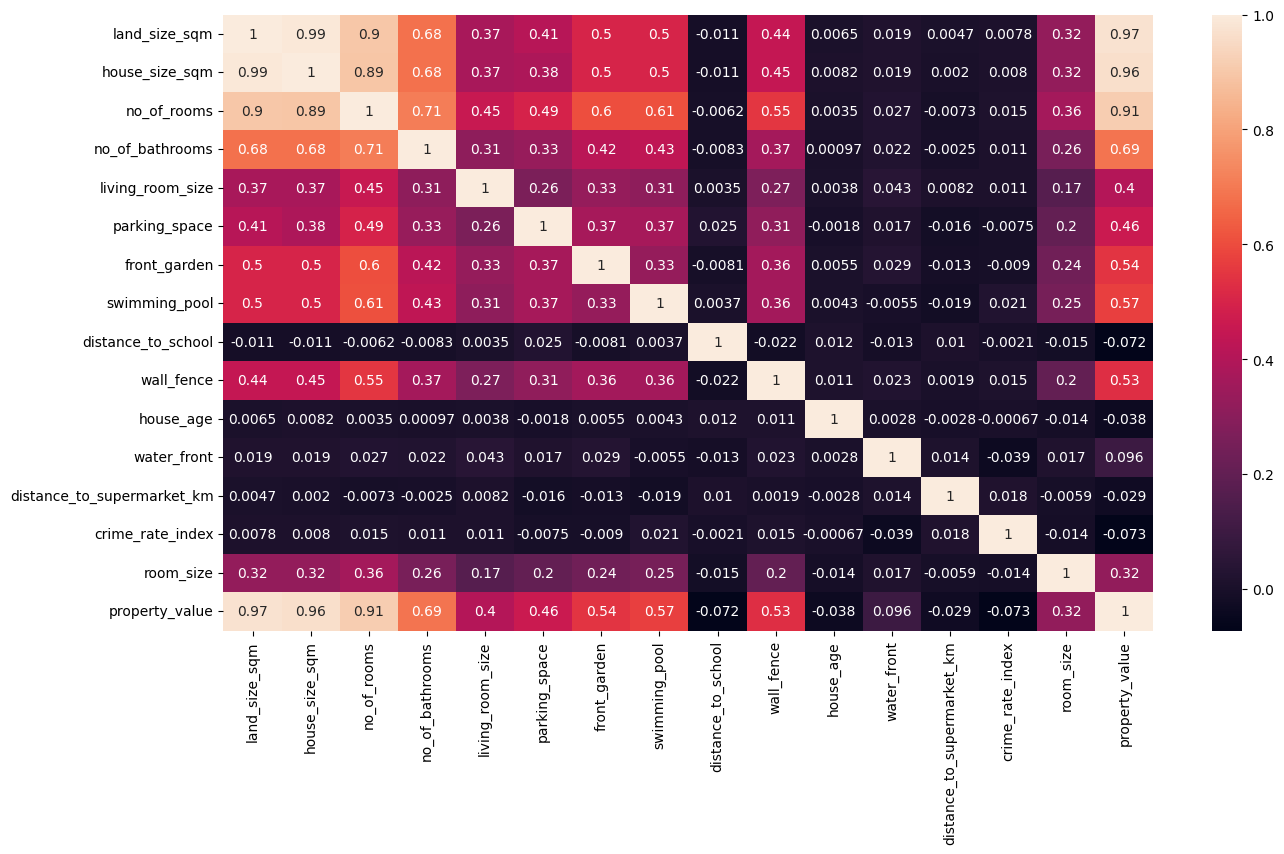

In [155]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

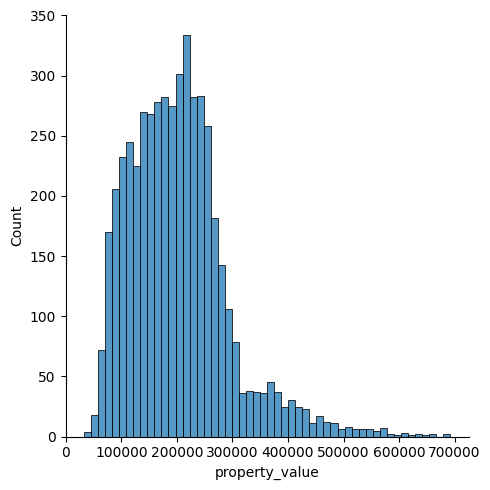

In [156]:
sns.displot(df["property_value"])

In [157]:
df.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,living_room_size,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
0,201,177,3,1,0,1,1,0,3.3,1,10,0,6.8,0.90,0,165432
1,196,182,4,3,1,1,0,1,1.2,1,11,0,4.1,1.42,1,187043
2,198,182,4,4,1,1,0,1,5.9,0,20,0,2.1,4.12,1,148658
3,178,166,2,3,0,1,0,0,5.9,0,5,0,0.7,4.36,0,123785
4,183,165,3,1,1,1,0,0,3.8,1,8,0,0.7,0.42,0,156470


In [158]:
X = df.drop("property_value",axis=1)
Y = df["property_value"]



In [160]:
X.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,living_room_size,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size
0,201,177,3,1,0,1,1,0,3.3,1,10,0,6.8,0.90,0
1,196,182,4,3,1,1,0,1,1.2,1,11,0,4.1,1.42,1
2,198,182,4,4,1,1,0,1,5.9,0,20,0,2.1,4.12,1
3,178,166,2,3,0,1,0,0,5.9,0,5,0,0.7,4.36,0
4,183,165,3,1,1,1,0,0,3.8,1,8,0,0.7,0.42,0


In [163]:
X.shape , Y.shape

((4954, 15), (4954,))

In [164]:
from sklearn.model_selection import train_test_split

In [169]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [170]:
X_train.shape , Y_train.shape

((3963, 15), (3963,))

In [171]:
X_test.shape , Y_test.shape

((991, 15), (991,))

In [172]:
from sklearn.preprocessing import MinMaxScaler

In [173]:
mscaler = MinMaxScaler()

In [174]:
mscaler.fit(X_train)

MinMaxScaler()

In [178]:
X_train_scale=mscaler.transform(X_train)

In [179]:
X_train_scale

array([[0.23850575, 0.24233129, 0.57142857, ..., 0.95588235, 0.19899666,
        1.        ],
       [0.47988506, 0.50306748, 0.71428571, ..., 0.77941176, 0.39464883,
        1.        ],
       [0.14224138, 0.15030675, 0.42857143, ..., 0.29411765, 0.73244147,
        1.        ],
       ...,
       [0.06321839, 0.08128834, 0.        , ..., 0.79411765, 0.57692308,
        1.        ],
       [0.32902299, 0.37269939, 0.71428571, ..., 0.32352941, 0.25083612,
        0.66666667],
       [0.14798851, 0.15337423, 0.42857143, ..., 0.08823529, 0.54013378,
        0.33333333]])

In [180]:
X_test_scale = mscaler.transform(X_test)

In [181]:
X_test_scale

array([[0.00287356, 0.00920245, 0.        , ..., 0.82352941, 0.19565217,
        0.        ],
       [0.27873563, 0.26993865, 0.57142857, ..., 0.52941176, 0.0819398 ,
        0.66666667],
       [0.04022989, 0.0506135 , 0.14285714, ..., 0.35294118, 0.72240803,
        0.        ],
       ...,
       [0.32183908, 0.32822086, 0.57142857, ..., 0.01470588, 0.84949833,
        0.66666667],
       [0.41091954, 0.44325153, 0.71428571, ..., 0.58823529, 0.32608696,
        1.        ],
       [0.01867816, 0.03680982, 0.        , ..., 0.83823529, 0.26755853,
        0.        ]])

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
model = LinearRegression()

In [184]:
model.fit(X_train_scale , Y_train)

LinearRegression()

In [186]:
prediction=model.predict(X_test_scale)

In [191]:
prediction[3]

133880.53400118137

In [188]:
np_Y_test = np.array(Y_test)

In [192]:
np_Y_test[3]

132269

In [193]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [195]:
print("Mean_absolute_error - ",mean_absolute_error(Y_test , prediction))
print("Mean_squared_error - ",mean_squared_error(Y_test , prediction))
print("Root_Mean_absolute_error - ",np.sqrt(mean_squared_error(Y_test , prediction)))

Mean_absolute_error -  7196.433640269865
Mean_squared_error -  91708732.4120933
Root_Mean_absolute_error -  9576.467637500442


In [199]:
index_position = int(input("Enter the index postion :"))
np_Y_test = np.array(Y_test)
actual = np_Y_test[index_position]/1
pred = round(prediction[index_position],2)
diff = round(actual-pred,2)
perc = round(diff/actual*100,2)
print('Actual    : ' + str(actual))
print('Prediction: ' + str(pred))
print('Error     : ' + str(diff))
print('Error %   : ' + str(perc)+'%')

Enter the index postion :3
Actual    : 132269.0
Prediction: 133880.53
Error     : -1611.53
Error %   : -1.22%
